# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [2]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

In [ ]:
# Your code to create a clustering solution

In [3]:
data.isnull().sum() #No se encontraron valores nulos 

A    0
B    0
C    0
dtype: int64

Vamos a revisar la dispersion de datos

In [4]:
import recursos as rc

A 
Minimum:-1.65
Mean:1.51
Median:1.52
Mode:-1.65
Maximum:4.50

B 
Minimum:-1.63
Mean:1.52
Median:1.53
Mode:-1.63
Maximum:4.44



d:\ARES\LIBROS\Machine Learning\Ruta01\13 - Deep Learning Basic\ml-basics\challenges\recursos.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
d:\ARES\LIBROS\Machine Learning\Ruta01\13 - Deep Learning Basic\ml-basics\challenges\recursos.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
d:\ARES\LIBROS\Machine Learning\Ruta01\13 - Deep Learning Basic\ml-basics\challenges\recursos.py:162: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


C 
Minimum:-1.92
Mean:1.50
Median:1.47
Mode:-1.92
Maximum:4.68



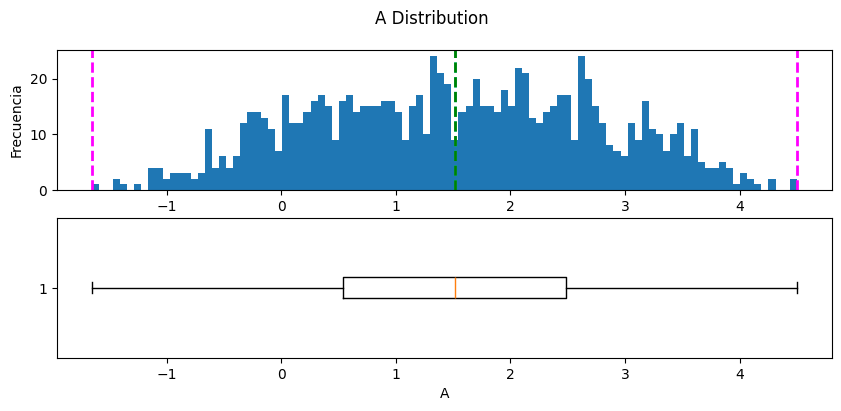

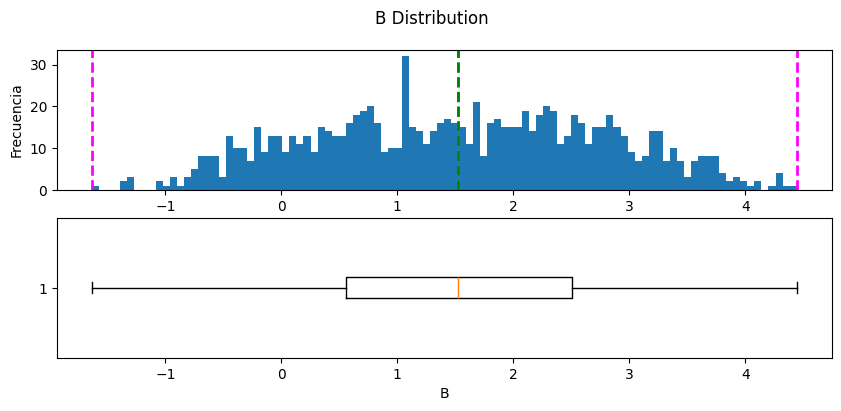

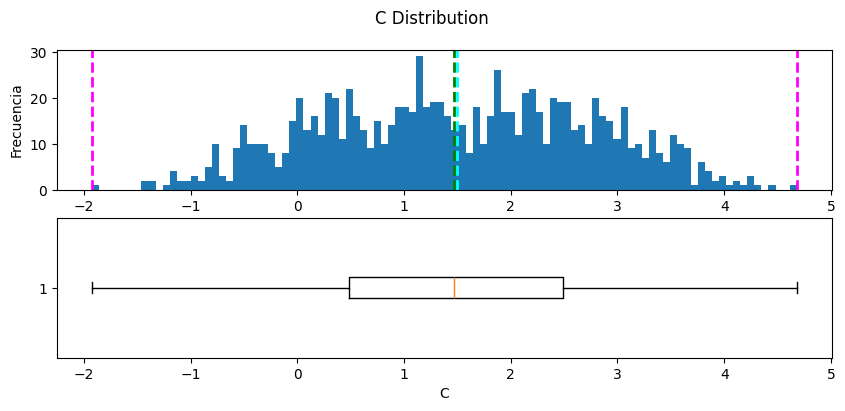

In [6]:
for columns in data.columns:
    rc.distribution_Data(data[columns])

In [7]:
import plotly.graph_objects as go
# Create the scatter plot
fig = go.Figure(data=[go.Scatter3d(x=data.A, y=data.B, z=data.C, mode='markers')])
# Show the plot
fig.show()

Tal parece que los datos estan correlacionados entre si, para comprobarlo haremos uso de una matriz de correlacion. Como simple inpeccion claro esta

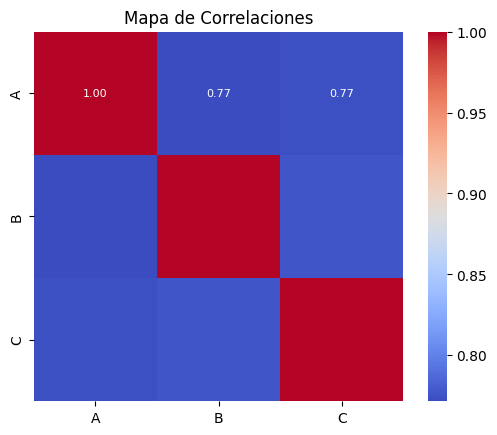

In [8]:
rc.mapa_correlaciones(data)

Efectivamente podemos concluir que las variables cuentan con una fuerte correlacion de 0.77, esto puede ser favorable ya que podriamos usar un metodo de reduccion de variables como el PCA para trabajar en un campo con 2 variables

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Escalamos las variables numericas para que esten en la misma escala 
scaled_features = MinMaxScaler().fit_transform(data)

# Aplicamos PCA
pca = PCA(n_components=2).fit(scaled_features)  # Entrenamos el metodo PCA  con nuestros valores escalados
features_2d = pca.transform(scaled_features)    # Aplicamos la reduccion de dimensionalidad
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

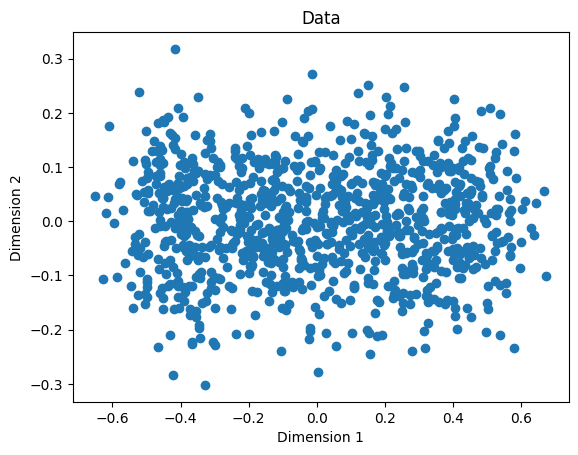

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Usamos la metrica WCC para multiples clusters, y asi determinar la cantidad de clusters optimos

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [31]:
# Creamos 15 modelos con 1 a 15 clusters 
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i,n_init=300)

    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

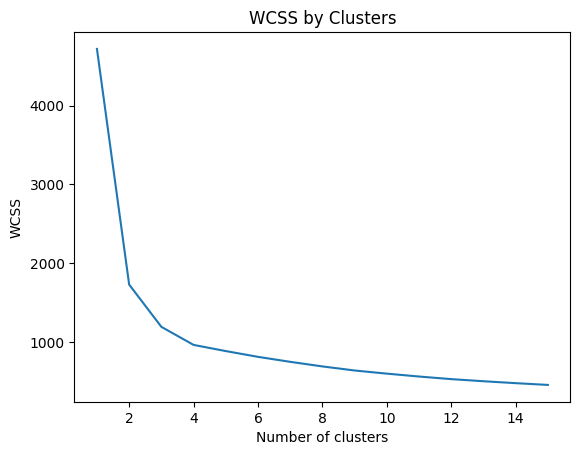

In [32]:
#Plot the WCSS values onto a line graph
plt.plot(range(1, 16), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

La grafica nos muestra que el numero optimo de clusters para nuestro modelo es 4, ya que aqui detectamos el codo de la curva.

In [33]:
# Creamos el modelo con 4 centroides

model = KMeans(n_clusters=4, init='k-means++', n_init=500, max_iter=1500)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(data)
# View the cluster assignments
km_clusters

array([0, 0, 3, 3, 0, 0, 3, 1, 0, 0, 3, 2, 2, 1, 1, 1, 3, 2, 1, 1, 0, 1,
       0, 0, 1, 2, 3, 0, 2, 1, 2, 0, 3, 1, 1, 0, 1, 1, 0, 1, 1, 1, 3, 2,
       3, 0, 0, 3, 3, 1, 0, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0, 1, 1,
       2, 1, 2, 3, 2, 1, 1, 3, 2, 1, 1, 1, 0, 2, 1, 2, 3, 2, 1, 3, 2, 1,
       1, 2, 2, 2, 3, 1, 2, 1, 3, 1, 3, 2, 1, 2, 3, 2, 1, 2, 3, 1, 1, 3,
       1, 2, 0, 0, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 0, 1, 2, 1, 3, 0, 2, 2,
       2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 3, 3, 1, 3, 1, 1, 3, 0, 0, 1,
       0, 2, 0, 1, 1, 1, 2, 0, 3, 3, 1, 2, 2, 0, 0, 3, 0, 2, 1, 3, 1, 2,
       2, 1, 1, 0, 1, 0, 2, 2, 1, 3, 0, 3, 3, 2, 2, 0, 2, 1, 3, 2, 1, 1,
       0, 3, 2, 3, 3, 3, 0, 0, 3, 1, 3, 0, 3, 3, 2, 0, 3, 1, 1, 3, 0, 3,
       1, 0, 2, 3, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 3, 3, 0, 3, 2, 3, 2,
       3, 1, 1, 2, 3, 0, 0, 1, 3, 1, 2, 2, 3, 3, 3, 0, 3, 0, 1, 3, 3, 1,
       0, 1, 2, 2, 2, 1, 3, 0, 1, 2, 0, 2, 3, 1, 1, 0, 3, 3, 2, 0, 0, 3,
       3, 2, 3, 0, 0, 2, 0, 3, 3, 3, 1, 1, 2, 0, 3,

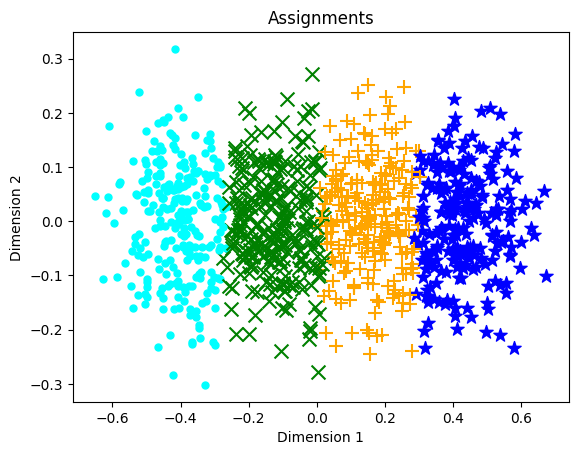

In [34]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange', 3:'cyan'}
    mrk_dic = {0:'*',1:'x',2:'+', 3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

In [23]:
pca.get_covariance()

array([[0.04141142, 0.03225104, 0.0302249 ],
       [0.03225104, 0.042192  , 0.03061397],
       [0.0302249 , 0.03061397, 0.03685042]])

In [13]:
scaled_features

array([[0.25405972, 0.3340625 , 0.29330502],
       [0.09393923, 0.1785612 , 0.3021151 ],
       [0.71521216, 0.59990379, 0.75838262],
       ...,
       [0.66241894, 0.56024627, 0.55320773],
       [0.22966477, 0.2637139 , 0.30285353],
       [0.65912144, 0.62517441, 0.63406712]])